In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import warnings
#from sklearn.exceptions import UndefinedMetricWarning
#warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC #, SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
#import itertools
#import math
from matplotlib import style
style.use('seaborn-white')
#sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3,"font.size":19, "axes.labelsize":19,
    "axes.titlesize":19})
#, "xtick.labelsize","ytick.labelsize", "legend.fontsize"
sns.set_color_codes()

import tl_learning as tl
import sys
sys.path.append('../')
import support_utils as sup
import tl_utils as tlut
import data_explore_utils as dex
import display_utils as dut

**Recommended NBExtensions:**
- Collapsible Headings
- Table_beautifier

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

### Import Candsets

In [3]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets_org_attr = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
candsets_org_attr.keys()

dict_keys(['katom_rewo', 'katom_cdi', 'rewo_cdi'])

In [8]:
candsets.keys()

dict_keys(['katom_cdi', 'rewo_cdi', 'katom_rewo'])

### Feature Set and Setup

In [9]:
all_feature = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'shape_lev_sim', 'shape_jac_q3_sim',
       'shape_jac_an_sim', 'shape_rel_jac_an_sim', 'shape_containment_sim',
       'shape_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'category_lev_sim', 'category_jac_q3_sim',
       'category_jac_an_sim', 'category_rel_jac_an_sim',
       'category_containment_sim', 'category_exact_sim',
       'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

In [10]:
len(all_feature) == len(candsets['katom_cdi'].columns.drop(['ids','label']))

True

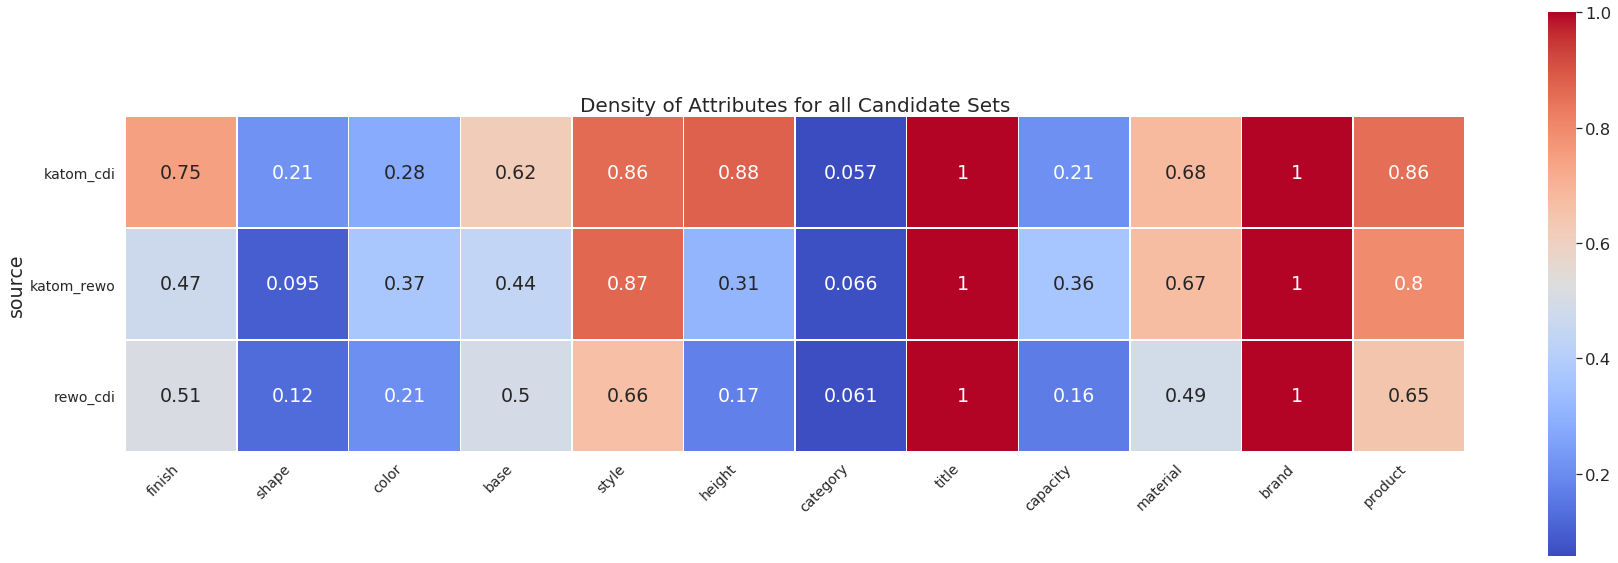

In [11]:
dex.plotDensityAttributesHeatmap(candsets)

In [12]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target in the TL setting
rc_cdi_katom_rewo = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'cdi_katom_rewo':rc_cdi_katom_rewo}

In [13]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'kitchen_candsets_super_results'
unsupervised_results = 'kitchen_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42
# assign which sklearn estimators to use for the TL Experiment
estimators_tl = {'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
                 'dectree':DecisionTreeClassifier(random_state=random_state),
                 'randforest':RandomForestClassifier(random_state=random_state),
                 'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic"),
                 'svm':LinearSVC(random_state=random_state,dual=False),
                 #'svm':SVC(random_state=random_state,kernel='linear'),
                 'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000)}

#### Import Supervised Results

In [14]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

#### Import Unsupervised Results

In [15]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

#### Run TL Experiment (quite time-consuming, skip to import if no re-run desired)

In [162]:
# perform TL experiments and store them in dictionary
# see DocString of returnF1TLResultsFromDictWithPlot() function for more information
# tl_results = returnF1TLResultsFromDictWithPlot(candsets,estimators_tl,all_features,dense_features_dict,n=10)

# save the experiment results to JSON
# saveTLResultsToJSON(tl_results=tl_results, filename='tl_results')

In [163]:
da_weighting = None
#dense_features_dict = None
n = 10
tl_results = tl.performTLFromDict(candsets,candsets_train,candsets_test,estimators_tl,all_feature,
                                  dense_features_dict,da_weighting,n)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [174]:
sup.saveResultsToJSON(tl_results,'../../results/tl/kitchen/kitchen_tl_results')

Saved in ../../results/tl/home/home_tl_results.json


#### Import TL Results

In [18]:
tl_results = sup.importJSONFileInDict('../../results/tl/kitchen/kitchen_tl_results.json')

### TL Results

#### No Domain Adaptation

##### Whole Table

In [19]:
df_tl_results = dut.createDFwithTLResults(tl_results,candsets_super_results,candsets_unsuper_results,
                           estimators_tl.keys(),['all','dense'],'no_weighting','../../results/tl/kitchen/kitchen_tl_results')

TL Results when doing naive Transfer (no_weighting) on all feature and only dense features


##### Table with only all_feature results

In [20]:
feature = ['all']
selected_estimator = None
df_tl_results_all = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                                         filename=f'../../results/tl/kitchen/kitchen_tl_results_{feature[0]}_feature')

##### Table with only dense_feature results

In [21]:
feature = ['dense']
selected_estimator = None
df_tl_results_dense = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,filename=f'../../results/tl/kitchen/kitchen_tl_results_{feature[0]}_feature')

In [22]:
feature = ['dense']
selected_estimator = ['svm','randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,filename='../../results/tl/kitchen/kitchen_tl_dense_svm_rf')

In [23]:
feature = ['dense']
selected_estimator = ['logreg','randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,filename='../../results/tl/kitchen/kitchen_tl_dense_lr_rf')

In [99]:
feature = ['dense']
selected_estimator = ['xgb','randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,filename='../../results/tl/kitchen/kitchen_tl_dense_xgb_rf')

In [135]:
feature = ['dense','all']
selected_estimator = ['randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                        filename=f'../../results/tl/kitchen/kitchen_tl_results_all_dense_rf')

In [136]:
df[('', '', 'Δ TL_avg')] = df.apply(lambda row: row[('dense','randforest','TL_avg')]-row[('all','randforest','TL_avg')],axis=1)

In [137]:
df

Features                     all                              dense          \
Estimators            randforest                         randforest           
Results                   TL_avg Tar_max Tar_exc Tar_sup     TL_avg Tar_max   
Source     Target                                                             
katom_cdi  rewo_cdi        0.697   0.775     120   0.822      0.696   0.771   
rewo_cdi   katom_cdi       0.641   0.920      10   0.904      0.655   0.916   
katom_cdi  katom_rewo      0.677   0.758      90   0.810      0.672   0.759   
katom_rewo katom_cdi       0.695   0.920      28   0.904      0.706   0.913   
rewo_cdi   katom_rewo      0.639   0.757      38   0.810      0.642   0.764   
katom_rewo rewo_cdi        0.551   0.773      14   0.822      0.546   0.766   

Features                                                    
Estimators                                                  
Results               Tar_exc Tar_sup unsuper_res Δ TL_avg  
Source     Target                                           
katom_cdi  rewo_cdi       140   0.822       0.652   -0.001  
rewo_cdi   katom_cdi       10   0.904       0.648    0.014  
katom_cdi  katom_rewo      70   0.810       0.196   -0.005  
katom_rewo katom_cdi       24   0.904       0.648    0.011  
rewo_cdi   katom_rewo      50   0.810       0.196    0.003  
katom_rewo rewo_cdi        14   0.822       0.652   -0.005

In [139]:
import math
filename = '../../results/tl/kitchen/kitchen_tl_results_all_dense_rf_delta'
###########################################################################################
# style functions as nested functions
# function for pandas styler. Highlight all max values of TL_avg
def highlight_max(data):
    attr_max = 'background-color: #FBFF75'
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr_max if v else '' for v in is_max]
    else: 
        is_max = data.groupby('TL_avg').transform('max') == data
        return pd.DataFrame(np.where(is_max, attr_max, ''),
                            index=data.index, columns=data.columns)
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tar_exc(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = row[:,:,'TL_avg']>row[:,:,'Tar_max']
    # counter if True at Pos 0 (i==0) in ser then lst at pos 2 (i+k) has to be changed
    # if i==1 then pos 6 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 2
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tl_super_same(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = ((row[:,:,'TL_avg']>row[:,:,'Tar_sup']) | ((row[:,:,'Tar_sup']-row[:,:,'TL_avg'])<=0.01))
    # counter if True at Pos 0 (i==0) in ser then lst at pos 3 (i+k) has to be changed
    # if i==1 then pos 7 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 3
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
############################################################################################

styles=[
    {'selector': 'th','props': [
        ('border-style', 'solid'),
        ('border-color', '#D3D3D3'),
        ('vertical-align','top'),
        ('text-align','center')]}]
  
col_tar_exc = [col for col in df.columns if col[2]=='Tar_exc']
col_tar_exc_format = {}
for col in col_tar_exc:
    col_tar_exc_format.update({col:lambda x: '<b>{0:g}</b>'.format(x) if (not math.isnan(float(x))) else '-'})

col_tar_exc_format.update({('','','unsuper_res'):lambda x: '<font color=\'#00938B\'><b>{}</b></font>'.format(round(x,3))})
col_tar_exc_format.update({('', '', 'Δ TL_avg'):lambda x: '<p style="background: #ffffff"><b>{}</b></p>'.format(round(x,3))})

col_tl_avg = [col for col in df.columns if col[2]=='TL_avg']
html = (df.style.\
        apply(highlight_max,axis=1,subset=pd.IndexSlice[:,col_tl_avg]).\
        apply(lambda x: ['background: #FF7070' if float(v) < x.iloc[-2] else '' for v in x], axis=1).\
        apply(highlight_tar_exc,axis=1).\
        apply(highlight_tl_super_same,axis=1)).set_table_styles(styles).set_precision(3).format(col_tar_exc_format)

display(html)
if(filename is not None):
    with open('{}.html'.format(filename), 'w') as f:
        f.write(html.render())

In [24]:
feature = ['dense']
selected_estimator = ['randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                        filename=None)

In [25]:
df[('dense', 'randforest', 'Δ TL_avg - Unsup')] = df.apply(lambda row: row[('dense','randforest','TL_avg')]-row[('','','unsuper_res')],axis=1)

In [33]:
df = df[[('dense', 'randforest',           'TL_avg'),
         ('dense', 'randforest', 'Δ TL_avg - Unsup'),
            ('dense', 'randforest',          'Tar_exc'),
            ('dense', 'randforest',          'Tar_sup'),
            (     '',           '',      'unsuper_res')]]

In [35]:
import math
filename = '../../results/tl/kitchen/kitchen_tl_results_dense_xgb_rf_subset_delta'
###########################################################################################
# style functions as nested functions
# function for pandas styler. Highlight all max values of TL_avg
def highlight_max(data):
    attr_max = 'background-color: #FBFF75'
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr_max if v else '' for v in is_max]
    else: 
        is_max = data.groupby('TL_avg').transform('max') == data
        return pd.DataFrame(np.where(is_max, attr_max, ''),
                            index=data.index, columns=data.columns)
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tar_exc(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = row[:,:,'TL_avg']>row[:,:,'Tar_max']
    # counter if True at Pos 0 (i==0) in ser then lst at pos 2 (i+k) has to be changed
    # if i==1 then pos 6 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 2
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tl_super_same(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = ((row[:,:,'TL_avg']>row[:,:,'Tar_sup']) | ((row[:,:,'Tar_sup']-row[:,:,'TL_avg'])<=0.01))
    # counter if True at Pos 0 (i==0) in ser then lst at pos 3 (i+k) has to be changed
    # if i==1 then pos 7 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 3
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
############################################################################################

styles=[
    {'selector': 'th','props': [
        ('border-style', 'solid'),
        ('border-color', '#D3D3D3'),
        ('vertical-align','top'),
        ('text-align','center')]}]
  
col_tar_exc = [col for col in df.columns if col[2]=='Tar_exc']
col_tar_exc_format = {}
for col in col_tar_exc:
    col_tar_exc_format.update({col:lambda x: '<b>{0:g}</b>'.format(x) if (not math.isnan(float(x))) else '-'})

col_tar_exc_format.update({('','','unsuper_res'):lambda x: '<font color=\'#00938B\'><b>{}</b></font>'.format(round(x,3))})
col_tar_exc_format.update({('dense', 'randforest', 'Δ TL_avg - Unsup'):lambda x: '<b>{}</b>'.format(round(x,3)) if x>0 else '<font color=\'#FF0000\'><b>{}</b></font>'.format(round(x,3))})

col_tl_avg = [col for col in df.columns if col[2]=='TL_avg']
col_tl_avg_unsup = [col for col in df.columns if col[2]=='TL_avg' or col[2]=='unsuper_res']
html = (df.style.\
        #apply(highlight_max,axis=1,subset=pd.IndexSlice[:,col_tl_avg]).\
        apply(lambda x: ['background: #FF7070' if float(v) < x.iloc[-1] else '' for v in x], axis=1,subset=pd.IndexSlice[:,col_tl_avg_unsup]).\
        #apply(highlight_tar_exc,axis=1).\
        apply(highlight_tl_super_same,axis=1)).set_table_styles(styles).set_precision(3).format(col_tar_exc_format)

display(html)
if(filename is not None):
    with open('{}.html'.format(filename), 'w') as f:
        f.write(html.render())

##### Table with only dense_feature results and Random Forest as selected estimator

In [182]:
feature = 'dense'
selected_estimator = 'randforest'
df_tl_results_rf_dense = tlut.returnDFwithTLResultsSubset(df_tl_results,candsets_unsuper_results,
                                                     feature,selected_estimator,
                                                     filename=f'../../results/tl/kitchen/kitchen_tl_results_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
katom_cdi,rewo_cdi,0.696,0.771,140,0.822,0.652
rewo_cdi,katom_cdi,0.655,0.916,10,0.904,0.648
katom_cdi,katom_rewo,0.672,0.759,70,0.810,0.196
katom_rewo,katom_cdi,0.706,0.913,24,0.904,0.648
rewo_cdi,katom_rewo,0.642,0.764,50,0.810,0.196
katom_rewo,rewo_cdi,0.546,0.766,14,0.822,0.652


____________________________________________________________

## Plots

### Transfer from Katom_cdi to Rewo_cdi

In [28]:
tl_results['katom_cdi_rewo_cdi']['dense'].keys()

dict_keys(['no_weighting'])

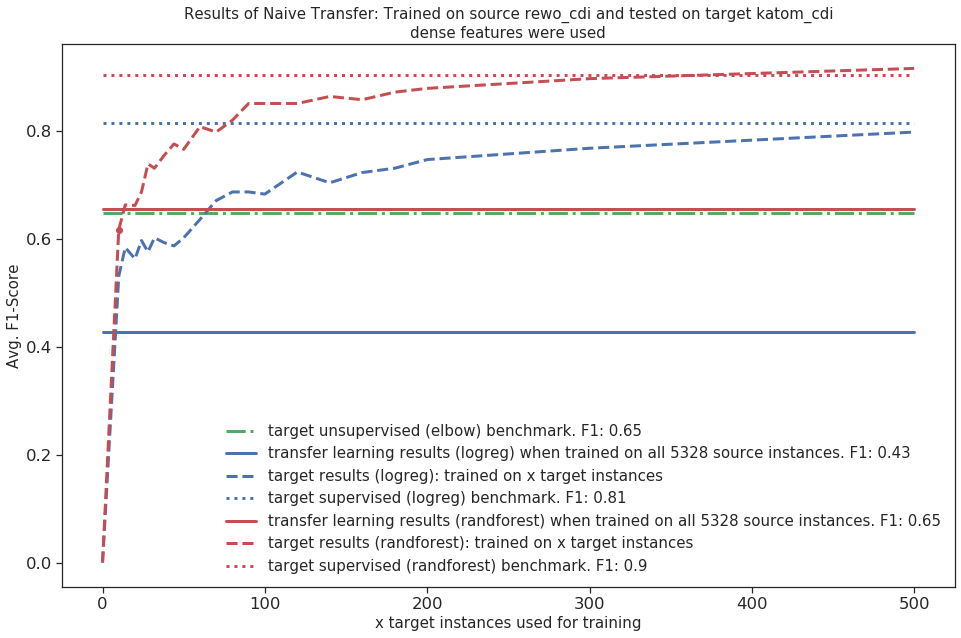

In [58]:
source_name = 'rewo_cdi'
target_name = 'katom_cdi'
feature = 'dense'
selected_estimators = ['logreg','randforest']
selected_da_weighting = ['no_weighting']
plot_target = True

dut.plotTLResults(tl_results,source_name,target_name,feature,selected_estimators,selected_da_weighting,
                  candsets,candsets_super_results,candsets_unsuper_results,plot_target,info_text=False,
                  path_for_output='../../results/graphics/kitchen_rewo_cdi_katom_cdi_lr_rf')